<a href="https://colab.research.google.com/github/HanifaElahi/Mediapipe/blob/main/Hands_Mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Mediapipe Hands***

---


* MediaPipe Hands is a high-fidelity hand and finger tracking solution. 
* It employs machine learning (ML) to infer 21 3D landmarks of a hand from just a single frame.
* Whereas current state-of-the-art approaches rely primarily on powerful desktop environments for inference, mediapipe hands achieves real-time performance on a mobile phone, and even scales to multiple hands. 


### ***ML Pipeline***


---

MediaPipe Hands utilizes an ML pipeline consisting of multiple models working together: 
1. A palm detection model that operates on the full image and returns an oriented hand bounding box.
2. A hand landmark model that operates on the cropped image region defined by the palm detector and returns high-fidelity 3D hand keypoints. 

Providing the accurately cropped hand image to the hand landmark model drastically reduces the need for data augmentation (e.g. rotations, translation and scale) and instead allows the network to dedicate most of its capacity towards coordinate prediction accuracy. 



### ***Models***


---

***Palm Detection Model***


* To detect initial hand locations, a single-shot detector model optimized for mobile real-time uses in a manner similar to the face detection model in MediaPipe Face Mesh is designed. 

(Detecting hands is a decidedly complex task: lite model and full model have to work across a variety of hand sizes with a large scale span (~20x) relative to the image frame and be able to detect occluded and self-occluded hands. Whereas faces have high contrast patterns, e.g., in the eye and mouth region, the lack of such features in hands makes it comparatively difficult to detect them reliably from their visual features alone. Instead, providing additional context, like arm, body, or person features, aids accurate hand localization.)

Mediapipe Hands addresses the above challenges using different strategies. First, train a palm detector instead of a hand detector, since estimating bounding boxes of rigid objects like palms and fists is significantly simpler than detecting hands with articulated fingers. In addition, as palms are smaller objects, the non-maximum suppression algorithm works well even for two-hand self-occlusion cases, like handshakes. Moreover, palms can be modelled using square bounding boxes (anchors in ML terminology) ignoring other aspect ratios, and therefore reducing the number of anchors by a factor of 3-5. Second, an encoder-decoder feature extractor is used for bigger scene context awareness even for small objects (similar to the RetinaNet approach). Lastly, minimize the focal loss during training to support a large amount of anchors resulting from the high scale variance.

With the above techniques, achieved an average precision of 95.7% in palm detection. Using a regular cross entropy loss and no decoder gives a baseline of just 86.22%.

***Hand Landmark Model***


After the palm detection over the whole image our subsequent hand landmark model performs precise keypoint localization of 21 3D hand-knuckle coordinates inside the detected hand regions via regression, that is direct coordinate prediction. The model learns a consistent internal hand pose representation and is robust even to partially visible hands and self-occlusions.


# ***Installation***



---



In [ ]:
!pip install mediapipe

     |████████████████████████████████| 32.8 MB 1.3 MB/s 


# ***Uploading Images***

---

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving hands_image.jpg to hands_image.jpg
Saving hands_image_1.jpg to hands_image_1.jpg
Saving hands_image_2.jpg to hands_image_2.jpg
Saving hands_image_3.jpg to hands_image_3.jpg
Saving hands_image_4.jpg to hands_image_4.jpg


# ***Importing Libraries***



---



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

# ***Mediapipe Hands***



---



In [ ]:
#setting desired width and height of images
DESIRED_HEIGHT = 320
DESIRED_WIDTH = 320

In [ ]:
#function to resize and image show

def resize_and_show(image):
  h, w = image.shape[:2] 
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

hands_image.jpg


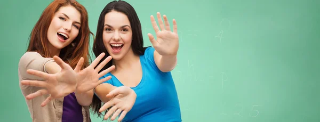

hands_image_1.jpg


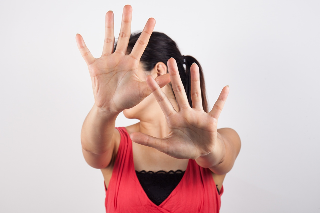

hands_image_2.jpg


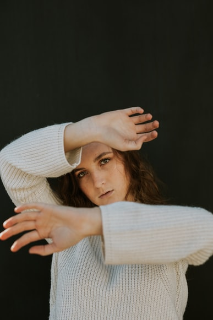

hands_image_3.jpg


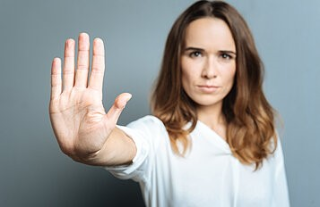

hands_image_4.jpg


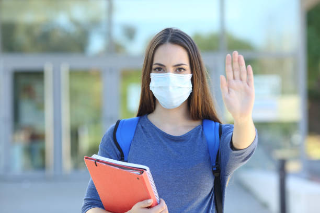

In [ ]:
# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

In [ ]:
#initializing
import mediapipe as mp
mp_hands = mp.solutions.hands #model
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# ***Hands Landmarks***

---


Handedness of hands_image.jpg:
[classification {
  index: 1
  score: 0.918519139289856
  label: "Right"
}
, classification {
  index: 0
  score: 0.7829842567443848
  label: "Left"
}
, classification {
  index: 0
  score: 0.9125334620475769
  label: "Left"
}
, classification {
  index: 0
  score: 0.9884219765663147
  label: "Left"
}
]
Hand landmarks of hands_image.jpg:
Index finger tip coordinate: ( 545.9550261497498, 134.83090341091156)
Index finger tip coordinate: ( 410.2708339691162, 207.14790481328964)
Index finger tip coordinate: ( 406.9219708442688, 101.67209756374359)
Index finger tip coordinate: ( 314.54694271087646, 32.45294089615345)


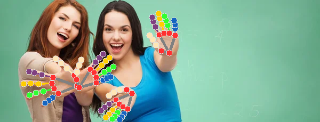

Handedness of hands_image_1.jpg:
[classification {
  index: 1
  score: 0.9932519197463989
  label: "Right"
}
, classification {
  index: 0
  score: 0.9946279525756836
  label: "Left"
}
]
Hand landmarks of hands_image_1.jpg:
Index finger tip coordinate: ( 676.865234375, 89.00775417685509)
Index finger tip coordinate: ( 673.3126068115234, 322.3276039958)


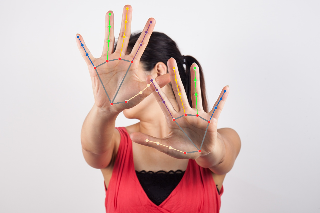

Handedness of hands_image_2.jpg:
[classification {
  index: 0
  score: 0.9802839756011963
  label: "Left"
}
, classification {
  index: 1
  score: 0.9412638545036316
  label: "Right"
}
]
Hand landmarks of hands_image_2.jpg:
Index finger tip coordinate: ( 361.01145190000534, 450.5360985994339)
Index finger tip coordinate: ( 105.62586924433708, 242.239492893219)


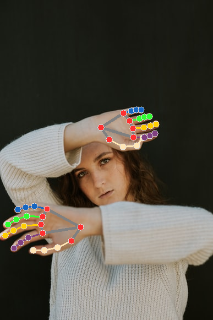

Handedness of hands_image_3.jpg:
[classification {
  index: 1
  score: 0.7919512391090393
  label: "Right"
}
]
Hand landmarks of hands_image_3.jpg:
Index finger tip coordinate: ( 247.11991292238235, 48.8161119222641)


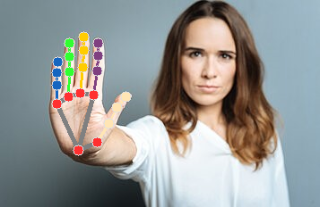

Handedness of hands_image_4.jpg:
[classification {
  index: 0
  score: 0.982781171798706
  label: "Left"
}
]
Hand landmarks of hands_image_4.jpg:
Index finger tip coordinate: ( 175.09121203422546, 109.47675848007202)


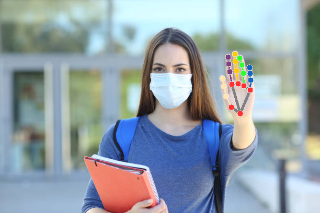

In [ ]:
# Run MediaPipe Hands.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=4,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB, flip the image around y-axis for correct 
    # handedness output and process it with MediaPipe Hands.
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

    # Print handedness (left v.s. right hand).
    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    if not results.multi_hand_landmarks:
      continue
    # Draw hand landmarks of each hand.
    print(f'Hand landmarks of {name}:')
    image_hight, image_width, _ = image.shape
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:
      # Print index finger tip coordinates.
      print(
          f'Index finger tip coordinate: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    resize_and_show(cv2.flip(annotated_image, 1))
    cv2.imwrite('annotated_image' + str(name), cv2.flip(annotated_image, 1))

# ***3D Hands World Landmarks***

---


Hand world landmarks of hands_image.jpg:


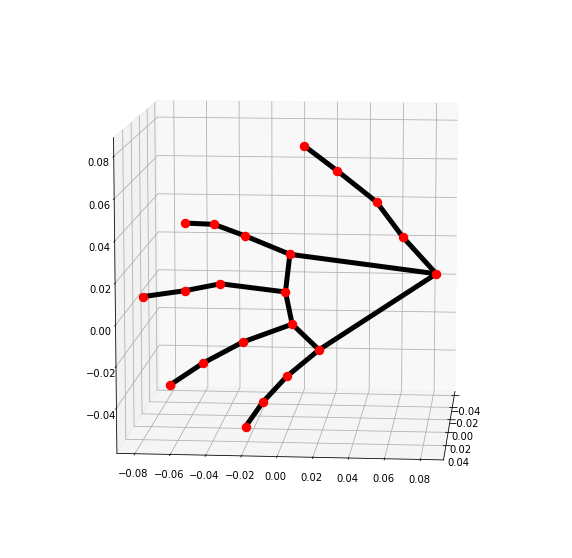

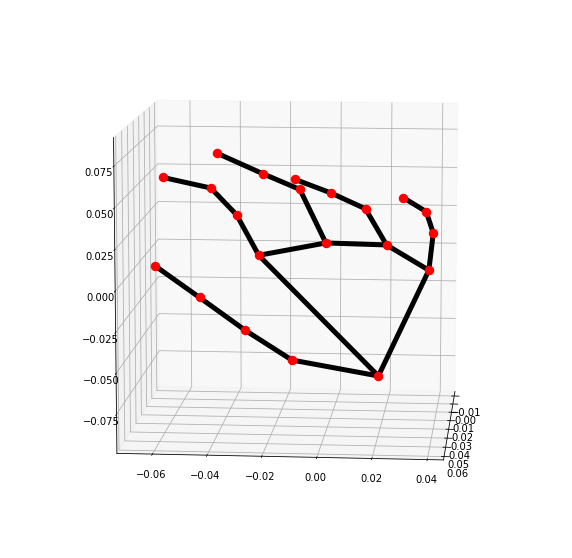

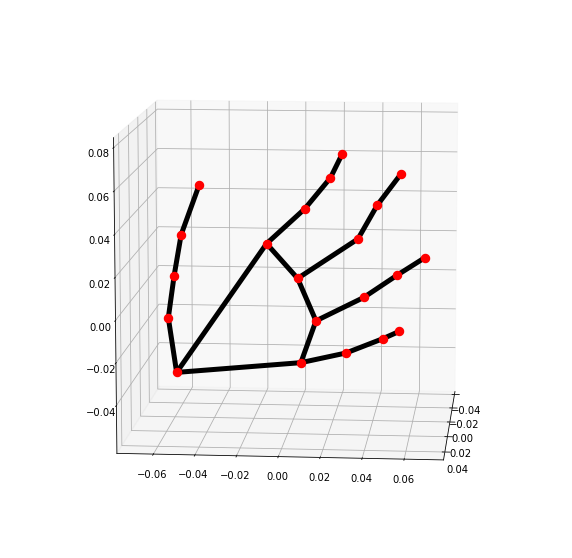

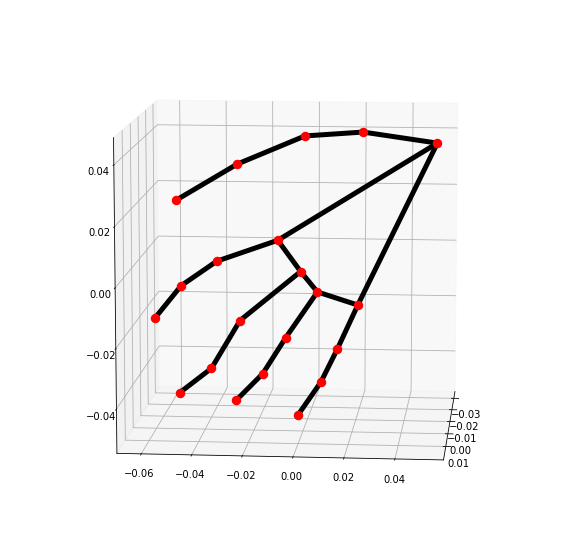

Hand world landmarks of hands_image_1.jpg:


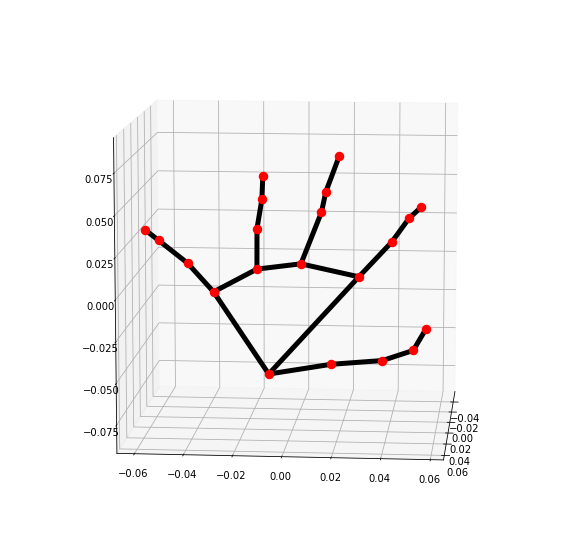

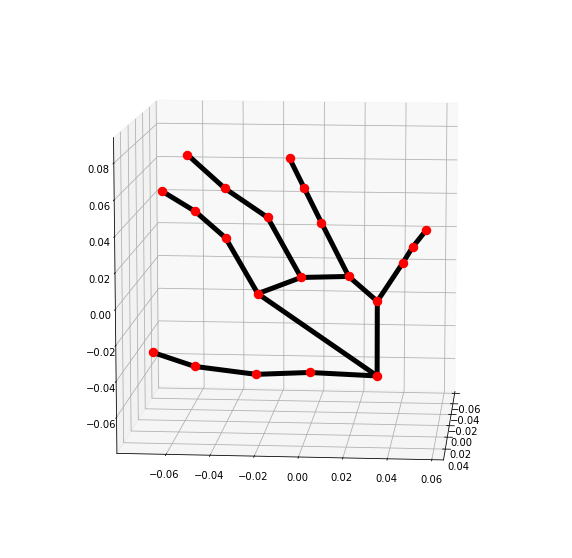

Hand world landmarks of hands_image_2.jpg:


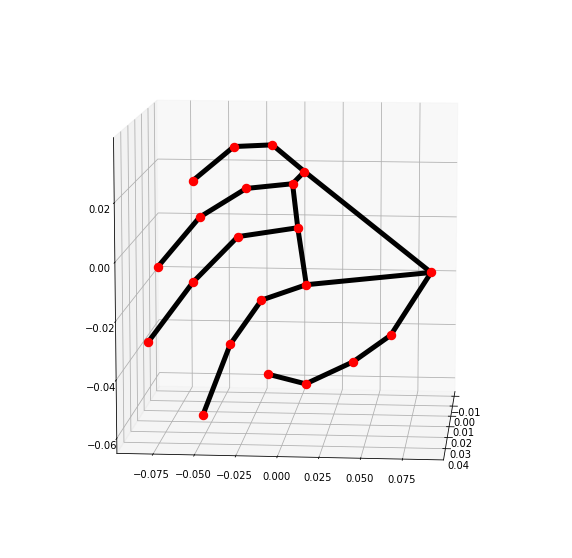

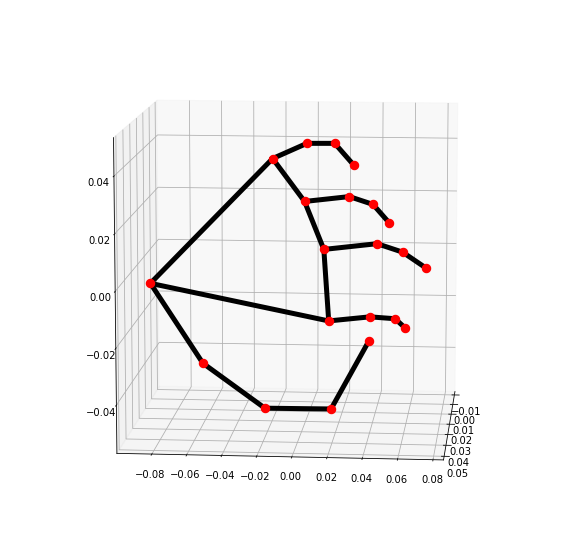

Hand world landmarks of hands_image_3.jpg:


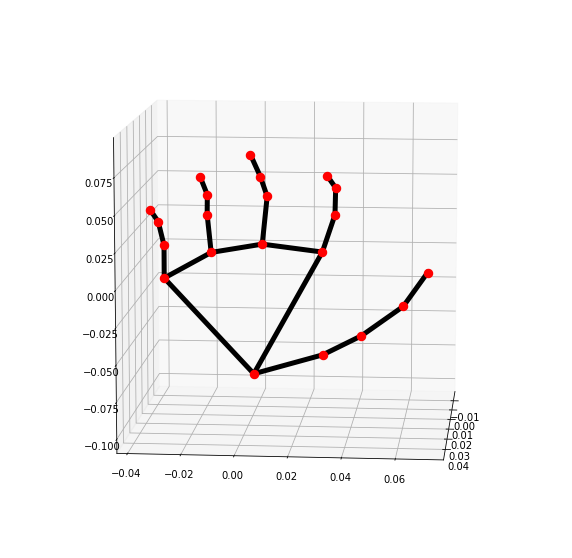

Hand world landmarks of hands_image_4.jpg:


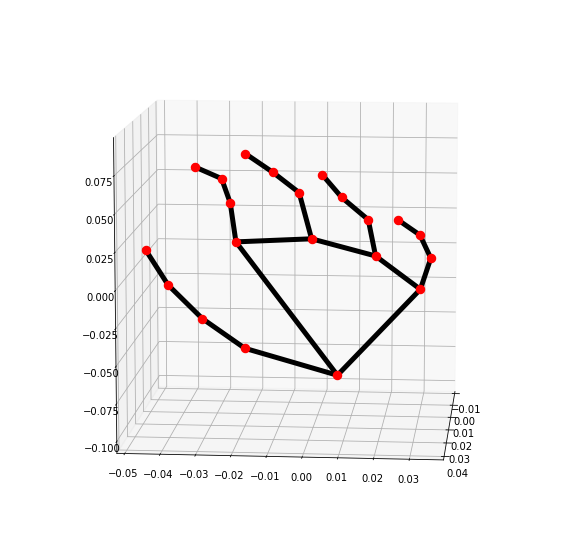

In [ ]:
# Run MediaPipe Hands and plot 3d hands world landmarks.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=4,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Hands.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Draw hand world landmarks.
    print(f'Hand world landmarks of {name}:')
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

# **Source**:


---


1. https://colab.research.google.com/drive/1FvH5eTiZqayZBOHZsFm-i7D-JvoB9DVz#scrollTo=LAchzK23Uabf
2. https://google.github.io/mediapipe/solutions/hands#python-solution-api